In [59]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# Downloading data from Yahoo Finance
tickers = ['SPY','^VIX']


data = yf.download(tickers, '2014-01-01')['Adj Close']
# Rename the column from '^VIX' to 'VIX'
data = data.rename(columns={'^VIX': 'VIX'})
data.tail()

[*********************100%***********************]  2 of 2 completed


Ticker,SPY,VIX
Date,,
2024-09-17 00:00:00+00:00,561.348206,17.610001
2024-09-18 00:00:00+00:00,559.683350,18.230000
2024-09-19 00:00:00+00:00,569.234009,16.330000
2024-09-20 00:00:00+00:00,568.250000,16.150000
2024-09-23 00:00:00+00:00,569.669983,15.890000


<Axes: xlabel='Date'>

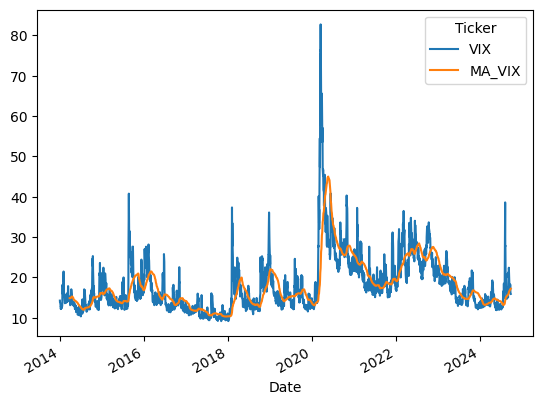

In [61]:
# Calculating the rolling mean of VIX
data['MA_VIX'] = data['VIX'].rolling(60).mean()
data[['VIX', 'MA_VIX']].plot()

## in a market volatility investor allocate funds in defensive sectors :
- Utilities
- Consumer Staples
- Healthcare

## in a less volatile market the investment focus shifts towards growth sectors such:
- Information Technology
- Consumer Discretionary
- Communication

In [62]:
# Calculating the daily returns for SP500
data['return_sp500'] = data['SPY'] / data['SPY'].shift(1) - 1
data[['SPY', 'return_sp500']].head()

Ticker,SPY,return_sp500
Date,,
2014-01-02 00:00:00+00:00,151.242935,NaN
2014-01-03 00:00:00+00:00,151.218170,-0.000164
2014-01-06 00:00:00+00:00,150.779922,-0.002898
2014-01-07 00:00:00+00:00,151.705948,0.006142
2014-01-08 00:00:00+00:00,151.739090,0.000218


In [63]:
# Creating signals for risk and de-risk based on VIX and MA_VIX
data['signal_risk'] = np.where((data.VIX > data.MA_VIX), 1, 0)
data['signal_derisk'] = np.where((data.VIX < data.MA_VIX), 1, 0)

# Drop rows with any missing values
data.dropna(inplace = True)
data.head()

Ticker,SPY,VIX,MA_VIX,return_sp500,signal_risk,signal_derisk
Date,,,,,,
2014-03-28 00:00:00+00:00,154.044800,14.41,14.844667,0.004930,0,1
2014-03-31 00:00:00+00:00,155.307098,13.88,14.838833,0.008194,0,1
2014-04-01 00:00:00+00:00,156.336868,13.10,14.827833,0.006631,0,1
2014-04-02 00:00:00+00:00,156.860046,13.09,14.820167,0.003346,0,1
2014-04-03 00:00:00+00:00,156.652481,13.37,14.827667,-0.001323,0,1


In [64]:
# # Mapping sector ETFs and downloading their Adjusted Close prices
# sector_etf = dict({
#     'Consumer Discretionary' : 'XLY',
#     'Consumer Staples' : 'XLP',
#     'Energy' : 'XLE',
#     'Financials' : 'XLF' ,
#     'Health Care' : 'XLV',
#     'Industrials' : 'XLI',
#     'Materials' : 'XLB',
#     'Real Estate' : 'XLRE',
#     'Information Technology' : 'XLK',
#     'Communication Services' : 'XLC',
#     'Utilities' : 'XLU'
# })

#Vanguard ETF
vanguard_etf_sector = {
    "Consumer Discretionary": "VCR",
    "Consumer Staples": "VDC",
    "Energy": "VDE",
    "Financials": "VFH",
    "Health Care": "VHT",
    "Industrials": "VIS",
    "Materials": "VAW",
    "Real Estate": "VNQ",
    "Information Technology": "VGT",
    "Communication Services": "VOX",
    "Utilities": "VPU"
}

df_sector_etf = yf.download(list(vanguard_etf_sector.values()), '2016-01-01')['Adj Close']
df_sector_etf.head()

[*********************100%***********************]  11 of 11 completed


Ticker,VAW,VCR,VDC,VDE,VFH,VGT,VHT,VIS,VNQ,VOX,VPU
Date,,,,,,,,,,,
2016-01-04 00:00:00+00:00,79.329819,108.286049,102.763153,61.476055,39.685352,97.758636,115.229485,86.740593,56.034454,71.763756,71.541237
2016-01-05 00:00:00+00:00,79.295593,108.088203,103.368103,61.697952,39.835548,97.290977,115.760201,86.854027,57.115719,72.527191,72.045639
2016-01-06 00:00:00+00:00,77.353401,106.838066,102.932549,59.301357,39.284828,95.970535,114.574898,85.527878,56.959232,72.214882,71.946289
2016-01-07 00:00:00+00:00,75.180237,104.607559,101.609665,57.821960,38.208420,92.880295,112.045097,83.146049,55.849491,70.731384,71.418953
2016-01-08 00:00:00+00:00,74.358871,103.375420,100.819206,57.089645,37.599293,92.082550,110.417542,82.046745,55.102562,70.176125,71.388390


In [65]:
# Calculating average returns for risk and de-risk ETFs
df_sector_etf['return_derisk_etf'] = (df_sector_etf[['VGT', 'VOX', 'VCR']] / df_sector_etf[['VGT', 'VOX', 'VCR']].shift(1) - 1).mean(axis = 1)
df_sector_etf['return_risk_etf'] = (df_sector_etf[['VPU', 'VDC', 'VHT']] / df_sector_etf[['VPU', 'VDC', 'VHT']].shift(1) - 1).mean(axis = 1)
df_sector_etf.head()

Ticker,VAW,VCR,VDC,VDE,VFH,VGT,VHT,VIS,VNQ,VOX,VPU,return_derisk_etf,return_risk_etf
Date,,,,,,,,,,,,,
2016-01-04 00:00:00+00:00,79.329819,108.286049,102.763153,61.476055,39.685352,97.758636,115.229485,86.740593,56.034454,71.763756,71.541237,NaN,NaN
2016-01-05 00:00:00+00:00,79.295593,108.088203,103.368103,61.697952,39.835548,97.290977,115.760201,86.854027,57.115719,72.527191,72.045639,0.001342,0.005848
2016-01-06 00:00:00+00:00,77.353401,106.838066,102.932549,59.301357,39.284828,95.970535,114.574898,85.527878,56.959232,72.214882,71.946289,-0.009815,-0.005277
2016-01-07 00:00:00+00:00,75.180237,104.607559,101.609665,57.821960,38.208420,92.880295,112.045097,83.146049,55.849491,70.731384,71.418953,-0.024540,-0.014087
2016-01-08 00:00:00+00:00,74.358871,103.375420,100.819206,57.089645,37.599293,92.082550,110.417542,82.046745,55.102562,70.176125,71.388390,-0.009406,-0.007578


In [72]:
# Merging dataframes and calculating strategy returns
df_all = pd.concat([data, df_sector_etf[['return_derisk_etf', 'return_risk_etf']]], axis = 1).dropna()
df_all.head()

Ticker,SPY,VIX,MA_VIX,return_sp500,signal_risk,signal_derisk,return_derisk_etf,return_risk_etf
Date,,,,,,,,
2016-01-05 00:00:00+00:00,173.245590,19.340000,16.865333,0.001692,1,0,0.001342,0.005848
2016-01-06 00:00:00+00:00,171.060196,20.590000,16.923833,-0.012614,1,0,-0.009815,-0.005277
2016-01-07 00:00:00+00:00,166.956223,24.990000,17.070833,-0.023991,1,0,-0.024540,-0.014087
2016-01-08 00:00:00+00:00,165.123596,27.010000,17.226500,-0.010977,1,0,-0.009406,-0.007578
2016-01-11 00:00:00+00:00,165.287079,24.299999,17.331000,0.000990,1,0,0.005281,-0.000008


In [73]:
# Checking for missing values
df_all.isna().sum()

Ticker
SPY                  0
VIX                  0
MA_VIX               0
return_sp500         0
signal_risk          0
signal_derisk        0
return_derisk_etf    0
return_risk_etf      0
dtype: int64

In [74]:
# Calculating strategy returns and cumulative performance
df_all['return_strategy'] = df_all['signal_risk'] * df_all['return_risk_etf'].shift(-1) + df_all['signal_derisk'] * df_all['return_derisk_etf'].shift(-1)
df_all['rebased_strategy'] = (df_all['return_strategy'] + 1).cumprod()
df_all['rebased_sp500'] = (df_all['return_sp500'] + 1).cumprod()
df_all.dropna(inplace = True)
df_all.tail()

Ticker,SPY,VIX,MA_VIX,return_sp500,signal_risk,signal_derisk,return_derisk_etf,return_risk_etf,return_strategy,rebased_strategy,rebased_sp500
Date,,,,,,,,,,,
2024-09-16 00:00:00+00:00,561.118896,17.139999,16.852000,0.001477,1,0,0.000515,0.005929,-0.005394,3.990413,3.244343
2024-09-17 00:00:00+00:00,561.348206,17.610001,16.925500,0.000409,1,0,0.003406,-0.005394,-0.004563,3.972206,3.245669
2024-09-18 00:00:00+00:00,559.683350,18.230000,17.007167,-0.002966,1,0,-0.002286,-0.004563,-0.001211,3.967397,3.236043
2024-09-19 00:00:00+00:00,569.234009,16.330000,17.065333,0.017064,0,1,0.022817,-0.001211,-0.001994,3.959488,3.291264
2024-09-20 00:00:00+00:00,568.250000,16.150000,17.125333,-0.001729,0,1,-0.001994,0.007936,0.003134,3.971898,3.285575


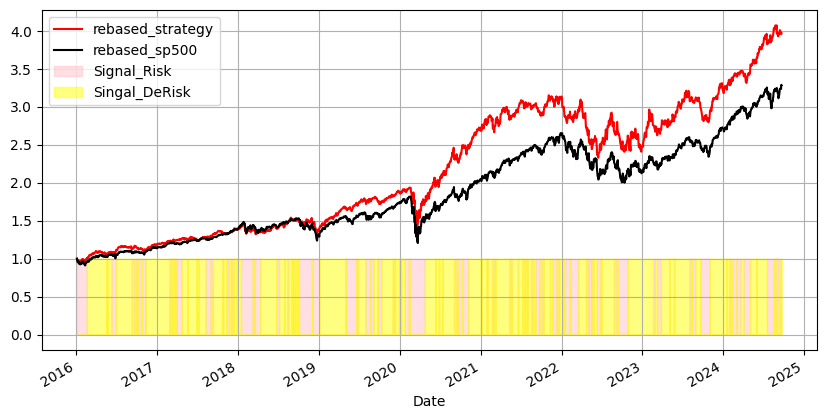

In [75]:
# Plotting cumulative performance with risk and de-risk signals
df_all[['rebased_strategy', 'rebased_sp500']].plot(figsize = (10, 5), color = ['red', 'black'])
plt.fill_between(df_all.index,  df_all.signal_risk, color = 'pink', alpha = 0.5, label = 'Signal_Risk')
plt.fill_between(df_all.index,  df_all.signal_derisk, color = 'yellow', alpha = 0.5, label = 'Singal_DeRisk')
plt.legend()
plt.grid()

In [76]:
# Calculating Sharpe Ratio for S&P 500 and Strategy
sharpe_sp500 = np.mean(df_all.return_sp500) / np.std(df_all.return_sp500) * (252 ** 0.5)
sharpe_strategy = np.mean(df_all.return_strategy) / np.std(df_all.return_strategy) * (252 ** 0.5)
print(f'Sharpe Ratio: S&P 500 {round(sharpe_sp500,2)}; Strategy {round(sharpe_strategy, 2)}')

# Calculating Cumulative Return for S&P 500 and Strategy
print(f'Cumulative Return: S&P 500 {round(df_all.rebased_sp500[-1] - 1, 2) * 100}%; Strategy {round(df_all.rebased_strategy[-1] -1, 2)*100}%')

# Calculating Annualized Return for S&P 500 and Strategy
diff_day = df_all.index[-1] - df_all.index[0]
holding_period = diff_day.days
cum_return_sp500 = df_all.rebased_sp500[-1] - 1
annual_sp500 = (cum_return_sp500 + 1) ** (365/ holding_period) - 1
cum_return_strategy = df_all.rebased_strategy[-1] - 1
annual_strategy = (cum_return_strategy + 1) ** (365/ holding_period) - 1
print(f'Annualized Return: S&P 500 {round(annual_sp500, 2)}; Strategy {round(annual_strategy, 2)}')

# Calculating Maximum Drawdown for S&P 500 and Strategy
running_max_sp500 = np.maximum.accumulate(df_all.rebased_sp500)
running_max_sp500[running_max_sp500 < 1] = 1
DD_sp500 = df_all.rebased_sp500 / running_max_sp500 - 1
MDD_sp500 = DD_sp500.min()
running_max_strategy = np.maximum.accumulate(df_all.rebased_strategy)
running_max_strategy[running_max_strategy < 1] = 1
DD_strategy = df_all.rebased_strategy / running_max_strategy - 1
MDD_strategy = DD_strategy.min()
print(f'Maximum Drawdown: S&P 500: {round(MDD_sp500,2)}; Strategy: {round(MDD_strategy, 2)}')

Sharpe Ratio: S&P 500 0.85; Strategy 0.98
Cumulative Return: S&P 500 229.0%; Strategy 297.0%
Annualized Return: S&P 500 0.15; Strategy 0.17
Maximum Drawdown: S&P 500: -0.34; Strategy: -0.3


/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_19591/4262678339.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Cumulative Return: S&P 500 {round(df_all.rebased_sp500[-1] - 1, 2) * 100}%; Strategy {round(df_all.rebased_strategy[-1] -1, 2)*100}%')
/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_19591/4262678339.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_return_sp500 = df_all.rebased_sp500[-1] - 1
/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_19591/4262678339.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versi

In [79]:
# Getting the last row of data to represent the current moment
latest_data = df_all.iloc[-1]
print(latest_data)

# Check current signal
if latest_data['signal_risk'] == 1:
    # Risk-on environment
    sectors_to_buy = ['VGT', 'VOX', 'VCR']
    print(f"Risk-On Environment. Buy these sectors: {', '.join(sectors_to_buy)}")
elif latest_data['signal_derisk'] == 1:
    # De-risk environment
    sectors_to_buy = ['VPU', 'VDC', 'VHT']
    print(f"De-Risk Environment. Buy these sectors: {', '.join(sectors_to_buy)}")

# Optionally, you can look at the latest performance of these ETFs as well
latest_returns = df_sector_etf.iloc[-1][sectors_to_buy]
print(f"Latest returns of these sectors:\n{latest_returns}")


Ticker
SPY                  568.250000
VIX                   16.150000
MA_VIX                17.125333
return_sp500          -0.001729
signal_risk            0.000000
signal_derisk          1.000000
return_derisk_etf     -0.001994
return_risk_etf        0.007936
return_strategy        0.003134
rebased_strategy       3.971898
rebased_sp500          3.285575
Name: 2024-09-20 00:00:00+00:00, dtype: float64
De-Risk Environment. Buy these sectors: VPU, VDC, VHT
Latest returns of these sectors:
Ticker
VPU    174.539993
VDC    219.899994
VHT    284.100006
Name: 2024-09-23 00:00:00+00:00, dtype: float64


In [84]:
# Getting the last row of data to represent the current moment
latest_data = df_all.iloc[-1]

# Initialize an empty dictionary to hold sectors and allocation amounts
allocation = {}

# Check current signal and allocate accordingly
if latest_data['signal_risk'] == 1:
    # Risk-on environment, select growth-oriented sectors
    sectors_to_buy = ['VGT', 'VOX', 'VCR', 'VIS']  # Technology, Communication, Consumer Discretionary, Industrials
    print(f"Risk-On Environment. Buy these sectors: {', '.join(sectors_to_buy)}")
    
    # Allocate $250,000 to each sector
    for sector in sectors_to_buy:
        allocation[sector] = 250000

elif latest_data['signal_derisk'] == 1:
    # De-risk environment, select defensive sectors
    sectors_to_buy = ['VPU', 'VDC', 'VHT', 'VNQ']  # Utilities, Consumer Staples, Health Care, Real Estate
    print(f"De-Risk Environment. Buy these sectors: {', '.join(sectors_to_buy)}")
    
    # Allocate $250,000 to each sector
    for sector in sectors_to_buy:
        allocation[sector] = 250000

# Output allocation plan
print(f"\nAllocation Plan:\n{allocation}")

# Optionally, you can look at the latest performance of these ETFs as well
latest_returns = df_sector_etf.iloc[-1][sectors_to_buy]
print(f"\nLatest returns of these sectors:\n{latest_returns}")



De-Risk Environment. Buy these sectors: VPU, VDC, VHT, VNQ

Allocation Plan:
{'VPU': 250000, 'VDC': 250000, 'VHT': 250000, 'VNQ': 250000}

Latest returns of these sectors:
Ticker
VPU    174.539993
VDC    219.899994
VHT    284.100006
VNQ     98.760002
Name: 2024-09-23 00:00:00+00:00, dtype: float64


In [83]:
# Check which sector within the selected group has the best recent performance
best_performing_sector = latest_returns.idxmax()
print(f"\nBest performing sector to buy: {best_performing_sector}")



Best performing sector to buy: VHT
